<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Pytorch_CNN_Fashion_Mnist_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

In [ ]:
import seaborn as sn

## Importing Data (Using data loader)

In [74]:
# CODE HERE
train_loader = DataLoader(train_data,batch_size =10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=1000,shuffle=False)



In [75]:
len(train_data)

60000

## Examining images

Label: [    3     2     0     2     0     6     4     0     4     8]
Class:  Dress Sweater T-shirt Sweater T-shirt Shirt Coat T-shirt Coat Bag


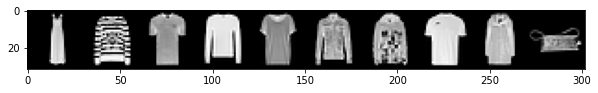

In [76]:
# CODE HERE
for images,labels in train_loader:
  break
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}'))

print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

im = make_grid(images,nrow=10)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))


## Convolutional Neural Network

In [77]:
# CODE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X,dim=1)
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

In [78]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## Checking parameter size

In [79]:
# CODE HERE
for param in model.parameters():
  print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


### Define loss function & optimizer


In [80]:
# CODE HERE
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)



### Train the model


In [81]:
# CODE HERE

import time
start_time = time.time()

train_losses = []
train_correct = []
accuracy = []

epochs = 5

for i in range(epochs):

  trn_corr = 0

  for b,(X_train,y_train) in enumerate(train_loader):
    b = b + 1

    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum() # True:1 / False:0 sum
    trn_corr = trn_corr + batch_corr

    if (b%600 == 0):
      print('Epoch: {} Batch: {} Loss: {} Accuracy: {}'.format(i,b,loss.item(),(trn_corr//(b/10))))
      accuracy.append((trn_corr//(b/10)))
    train_losses.append(loss)
    train_correct.append(trn_corr)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('{} of 5 epochs completed'.format(i))

current_time = time.time()
total = current_time - start_time
print('Training took {}  minutes'.format(total/60))


Epoch: 0 Batch: 600 Loss: 1.5566623210906982 Accuracy: 60.0
Epoch: 0 Batch: 1200 Loss: 0.7579238414764404 Accuracy: 67.0
Epoch: 0 Batch: 1800 Loss: 0.7490683794021606 Accuracy: 71.0
Epoch: 0 Batch: 2400 Loss: 0.1573152095079422 Accuracy: 73.0
Epoch: 0 Batch: 3000 Loss: 0.39263373613357544 Accuracy: 74.0
Epoch: 0 Batch: 3600 Loss: 0.4417538046836853 Accuracy: 76.0
Epoch: 0 Batch: 4200 Loss: 0.11792824417352676 Accuracy: 77.0
Epoch: 0 Batch: 4800 Loss: 0.5987025499343872 Accuracy: 77.0
Epoch: 0 Batch: 5400 Loss: 0.28573548793792725 Accuracy: 78.0
Epoch: 0 Batch: 6000 Loss: 0.5308948755264282 Accuracy: 79.0
Epoch: 1 Batch: 600 Loss: 0.21930758655071259 Accuracy: 84.0
Epoch: 1 Batch: 1200 Loss: 0.2690194249153137 Accuracy: 84.0
Epoch: 1 Batch: 1800 Loss: 0.09232534468173981 Accuracy: 85.0
Epoch: 1 Batch: 2400 Loss: 0.21322226524353027 Accuracy: 85.0
Epoch: 1 Batch: 3000 Loss: 0.20921504497528076 Accuracy: 85.0
Epoch: 1 Batch: 3600 Loss: 0.2654149532318115 Accuracy: 85.0
Epoch: 1 Batch: 420

## Results

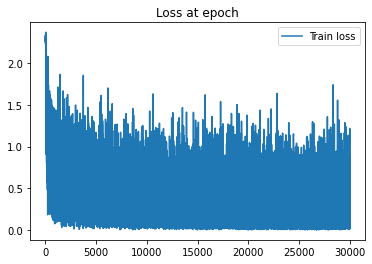

In [82]:
plt.plot(train_losses,label='Train loss')
plt.title('Loss at epoch')
plt.legend()
plt.show()

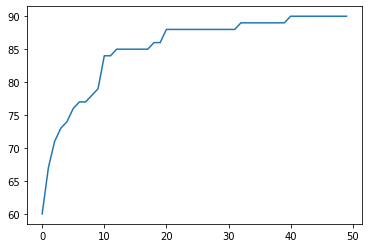

In [83]:
plt.plot(range(50),accuracy) # Accuracy per batch

### Evaluate the model


In [84]:
# CODE HERE
model.eval()

with torch.no_grad():
  correct = 0
  for (X_test,y_test) in test_loader:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct = correct + (predicted == y_test).sum()
    loss = criterion(y_val,y_test)





In [85]:
correct

tensor(8795)

In [86]:
correct.item()/len(test_data)*100

87.94999999999999

## Confusion Matrix

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

In [87]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:6}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[     0      1      2      3      4      5      6      7      8      9]]

[[    74      0      1      2      0      0      6      0      0      0]
 [     1    106      0      0      0      0      0      0      0      0]
 [     3      1     77      4      1      0     14      0      1      0]
 [     5      1      0     74      1      0      2      0      0      0]
 [     2      0     13      1     85      0     15      0      1      0]
 [     0      0      0      0      0    100      0      1      0      0]
 [    22      2      4      3      0      0     72      0      0      0]
 [     0      0      0      0      0      0      0     89      1      4]
 [     1      0      0      0      0      0      2      0    111      0]
 [     0      0      0      0      0      0      0      0      0     97]]


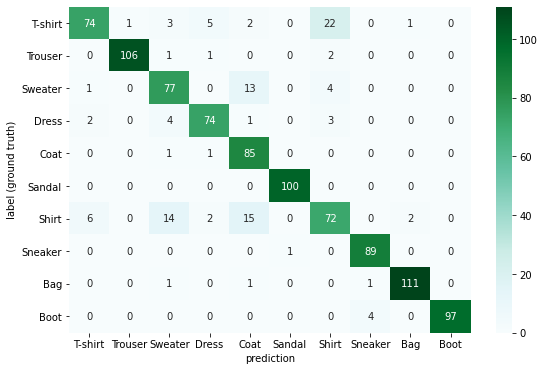

In [90]:
arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();